In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
import seaborn as sns

In [2]:
dt = load_breast_cancer()
print(dt['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [17]:
df = pd.DataFrame(np.c_[dt['data'],dt['target']], columns = np.append(dt['feature_names'],['target']))

In [18]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [13]:
df.shape

(569, 30)

In [19]:
df['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

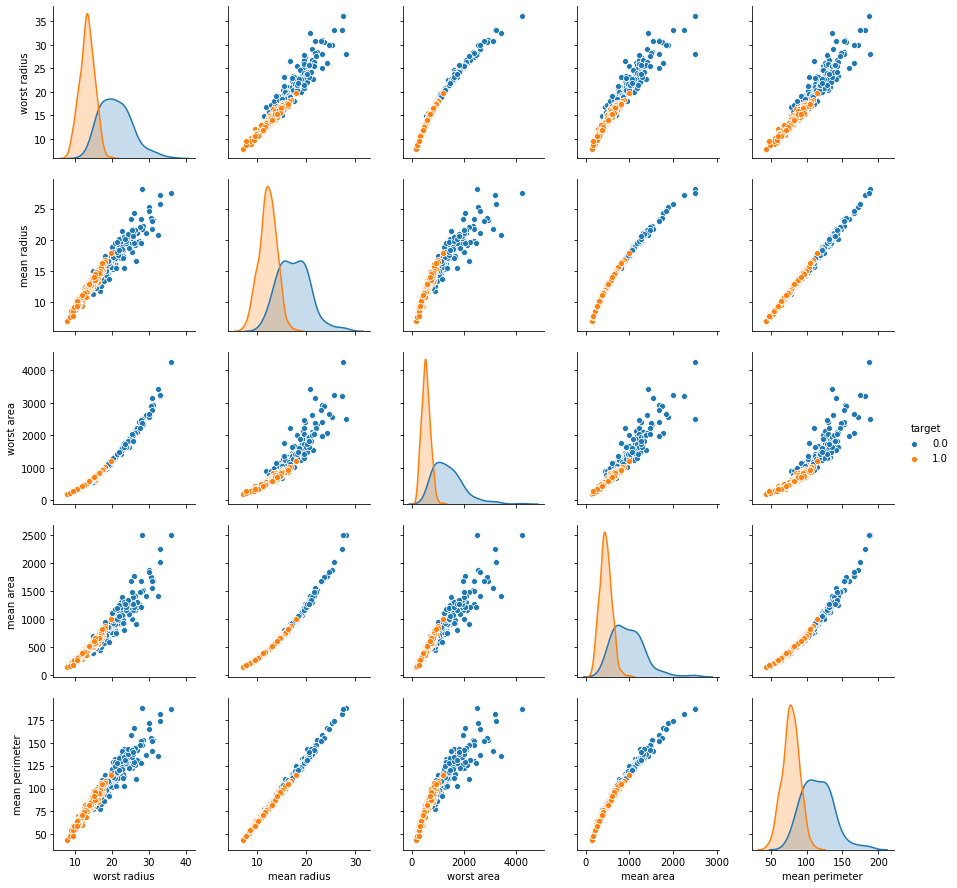

In [20]:
sns.pairplot(df, hue='target', vars=['worst radius','mean radius','worst area','mean area','mean perimeter'])

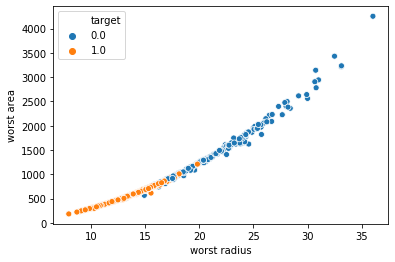

In [21]:
sns.scatterplot(x='worst radius',y='worst area', hue='target', data = df)

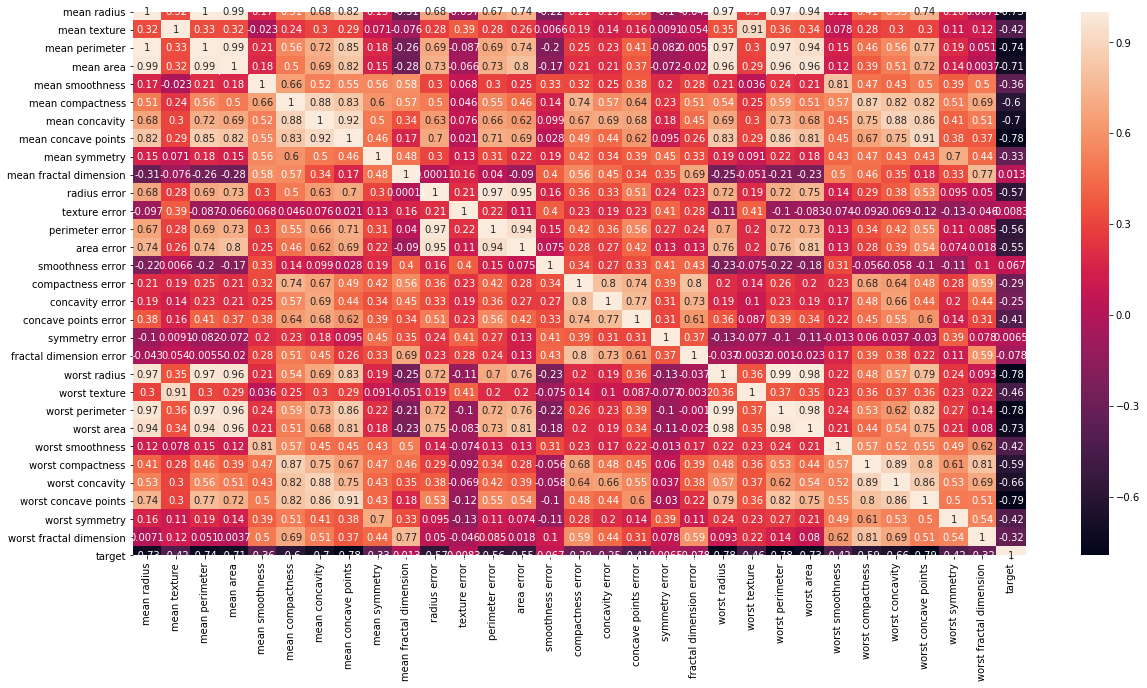

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

In [23]:
X = df.drop(['target'], axis=1)
Y = df['target']

In [25]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=5)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [28]:
Y_pred = classifier.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[44,  4],
       [ 1, 65]], dtype=int64)

In [36]:
ans = classifier.score(X_test, Y_test)
ans


0.956140350877193

In [38]:
pip install XGBoost


Note: you may need to restart the kernel to use updated packages.


In [1]:
from xgboost import XGBClassifier

In [2]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


NameError: name 'X_train' is not defined